In [13]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [3]:
#read income csv into a dataframe
csv_income = 'Main Avocado Tree (Resources)/income per metropolitan area.csv'
income_df = pd.read_csv(csv_income)
income_df.head()

,Geography,State,Year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [4]:
#Rename columns to match those in Avocado
rename_income_df = income_df.rename(columns={"Geography": "geography", "Year":"year"})
rename_income_df.head()

,geography,State,year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [5]:
#Merge the two dataframes together on Geography and year
merged_df = pd.merge(avocado_df,rename_income_df, on=['geography', 'year'], how='inner')
merged_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051


In [6]:
#Changing Date to ONLY reflect the month
split_cols = merged_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
new_merge = merged_df.join(split_cols)
new_merge

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income,Split-0,Split-1,Split-2
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780,2017,01,01
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,01
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780,2017,01,08
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,08
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780,2017,01,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051,2019,12,15
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051,2019,12,22
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051,2019,12,22
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051,2019,12,29


In [7]:
#make it pretty
renamed_merge = new_merge.rename(columns={'Split-1':'month', 'geography':'city'})
clean_merge = renamed_merge[['month', 'year', 'city', 'average_price', 'total_volume','Per capita personal income', '4046', '4225', '4770', 'type']]
clean_merge.head()

,month,year,city,average_price,total_volume,Per capita personal income,4046,4225,4770,type
0,01,2017,Albany,1.47,129948.23,36780,4845.77,117027.41,200.36,conventional
1,01,2017,Albany,1.87,1376.70,36780,71.65,192.63,0.00,organic
2,01,2017,Albany,1.55,91728.18,36780,3355.47,75641.23,56.91,conventional
3,01,2017,Albany,1.94,2229.52,36780,63.46,478.31,0.00,organic
4,01,2017,Albany,1.55,88526.26,36780,3327.65,71956.77,607.03,conventional


In [24]:
grouped_by_month_year = pd.DataFrame(clean_merge.groupby(["month", "year"]).mean().round(2))
grouped_by_month_year

average_price  total_volume  Per capita personal income      4046  \
month year                                                                      
01    2017           1.29      85824.45                     46772.6  29998.08   
      2018           1.31      91358.16                     48858.9  34655.89   
      2019           1.18     110071.23                     50364.9  35970.11   
02    2017           1.20      92785.03                     46772.6  34344.47   
      2018           1.30     102927.40                     48858.9  36502.58   
      2019           1.15     113938.54                     50364.9  34927.37   
03    2017           1.35      70185.32                     46772.6  24813.02   
      2018           1.31      99663.03                     48858.9  33014.77   
      2019           1.18     111437.38                     50364.9  31796.84   
04    2017           1.48      82430.93                     46772.6  32038.54   
      2018           1.29     104864.15                     48858.9  35152.71   
      2019           1.40     100839.19                     50364.9  29497.45   
05    2017           1.51      91975.17                     46772.6  35888.82   
      2018           1.23     121461.10                     48858.9  40992.84   
      2019           1.43     109952.21                     50364.9  30945.00   
06    2017           1.48      86907.90                     46772.6  33484.77   
      2018           1.21     110876.10                     48858.9  34281.44   
      2019           1.46      98651.65                     50364.9  26229.84   
07    2017           1.52      79987.07                     46772.6  31077.34   
      2018           1.26     106315.90                     48858.9  34612.47   
      2019           1.71      85368.73                     50364.9  21347.61   
08    2017           1.67      73161.77                     46772.6  28286.66   
      2018           1.38      96757.40                     48858.9  28800.23   
      2019           1.50      91925.43                     50364.9  24207.33   
09    2017           1.85      61290.20                     46772.6  23355.76   
      2018           1.44      91396.41                     48858.9  27689.95   
      2019           1.31      98259.55                     50364.9  26133.38   
10    2017           1.71      59899.63                     46772.6  23796.40   
      2018           1.28      93057.18                     48858.9  30988.67   
      2019           1.18      96412.63                     50364.9  26047.72   
11    2017           1.44      69346.37                     46772.6  28594.15   
      2018           1.30      80338.19                     48858.9  26899.93   
      2019           1.18      86490.01                     50364.9  23423.82   
12    2017           1.32      75267.88                     46772.6  28324.70   
      2018           1.34      71535.01                     48858.9  23609.96   
      2019           1.15      81736.11                     50364.9  25235.91   

                4225     4770  
month year                     
01    2017  21921.73   591.05  
      2018  17700.04   771.76  
      2019  18419.93   808.62  
02    2017  23781.35   609.19  
      2018  18093.70   699.64  
      2019  20570.66   852.52  
03    2017  17585.30   327.29  
      2018  15669.38   568.72  
      2019  18276.88   692.72  
04    2017  16938.60   377.05  
      2018  16517.49   742.99  
      2019  16813.32   808.02  
05    2017  17576.19   480.90  
      2018  19701.55  1051.74  
      2019  18970.25   804.06  
06    2017  16970.30   385.86  
      2018  17651.62  1323.19  
      2019  16185.74   636.05  
07    2017  16480.00   405.89  
      2018  17309.02   789.19  
      2019  15193.62   580.52  
08    2017  15213.33   270.29  
      2018  19160.60   691.41  
      2019  13868.81   560.91  
09    2017  13431.86   248.28  
      2018  17178.64   781.02  
      2019  14629.44   456.59  
10   

In [ ]:
#Question 6: Do different types of avocados have different sales trends? Arianne

#Task 6: facet (multiple lines on one) line graph (x-values = year, y-values = qty sold that year) for each type

In [ ]:
#grouped_by_month_year['4046'].unstack().plot()
#shows it broken up between 2017, 2018, 2019
#plt.show()


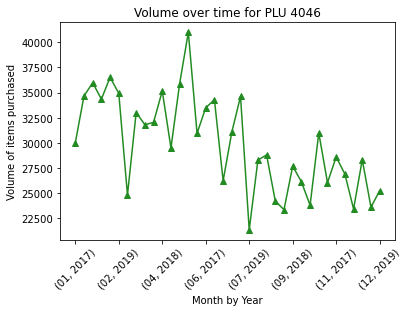

In [25]:
#look at volume for 4046
grouped_by_month_year['4046'].plot(marker='^', color='forestgreen')
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of items purchased")
plt.title("Volume over time for PLU 4046")

plt.show()


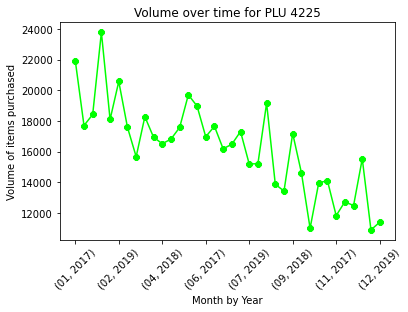

In [26]:
#look at volume for 4225
grouped_by_month_year['4225'].plot(marker='8', color='lime')
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of items purchased")
plt.title("Volume over time for PLU 4225")

plt.show()

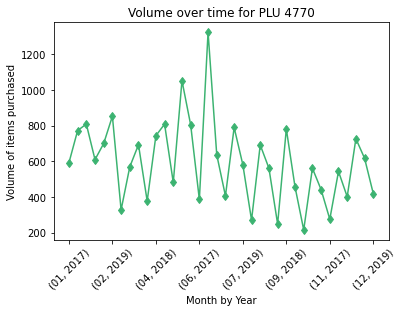

In [27]:
#Look at Volume for 4770
grouped_by_month_year['4770'].plot(marker='d', color='mediumseagreen')
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of items purchased")
plt.title("Volume over time for PLU 4770")

plt.show()

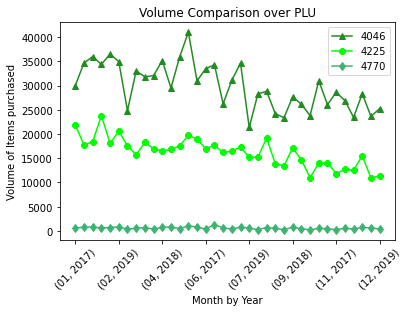

In [30]:
#Combine single charts into one main comparison chart
grouped_by_month_year['4046'].plot(marker='^', color='forestgreen')
grouped_by_month_year['4225'].plot(marker='8', color='lime')
grouped_by_month_year['4770'].plot(marker='d', color='mediumseagreen')
plt.legend()
plt.title("Volume Comparison over PLU")
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of Items purchased")

plt.show()